In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
!pip install --upgrade keras

     |████████████████████████████████| 378kB 2.8MB/s 
  Found existing installation: Keras 2.2.5
    Uninstalling Keras-2.2.5:
      Successfully uninstalled Keras-2.2.5


In [3]:
!pip install keras_retinanet

     |████████████████████████████████| 61kB 1.9MB/s 
  Created wheel for keras-retinanet: filename=keras_retinanet-0.5.1-cp36-cp36m-linux_x86_64.whl size=156787 sha256=72b6ccce9c7483d345c1f1bd3cc37b3345567426a3e2d27732a3932cb88e06fb
  Stored in directory: /root/.cache/pip/wheels/d9/a5/98/87f8ed08913b184bb625dde1c1277a4dfe969c77b377abde69
  Created wheel for keras-resnet: filename=keras_resnet-0.2.0-py2.py3-none-any.whl size=20485 sha256=40b6b9ed68399f8a47b09b52bf6d9822eea2b934d024bd8aaa79764d21f7efdc
  Stored in directory: /root/.cache/pip/wheels/5f/09/a5/497a30fd9ad9964e98a1254d1e164bcd1b8a5eda36197ecb3c
Successfully built keras-retinanet keras-resnet


In [0]:
import sys
sys.path.append('/content/drive/My Drive/研究所/研一/深度學習於影像/HW/HW3/retinanet-digit-detector-master/')

root = '/content/drive/My Drive/研究所/研一/深度學習於影像/HW/HW3/retinanet-digit-detector-master/'

In [0]:
# -*- coding: utf-8 -*-
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet import models
import cv2
import os
import glob
from tqdm import tqdm
import numpy as np
import time
from retina.utils import visualize_boxes
import matplotlib.pyplot as plt
import matplotlib
import tensorflow as tf

if not tf.test.gpu_device_name():
    print(
        'No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))


MODEL_PATH = root + 'snapshots/resnet152_pascal_05.h5'
IMAGE_PATH = root + '../test/test/3.png'


def load_inference_model(model_path=os.path.join('snapshots', 'resnet.h5')):
    model = models.load_model(model_path, backbone_name='resnet152')
    model = models.convert_model(model)
    model.summary()
    return model


def post_process(boxes, original_img, preprocessed_img):
    # post-processing
    h, w, _ = preprocessed_img.shape
    h2, w2, _ = original_img.shape
    boxes[:, :, 0] = boxes[:, :, 0] / w * w2
    boxes[:, :, 2] = boxes[:, :, 2] / w * w2
    boxes[:, :, 1] = boxes[:, :, 1] / h * h2
    boxes[:, :, 3] = boxes[:, :, 3] / h * h2
    return boxes


model = load_inference_model(MODEL_PATH)

# 2. Load image
# load image
image = read_image_bgr(IMAGE_PATH)

# copy to draw on
draw = image.copy()
draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

# preprocess image for network
image = preprocess_image(image)
image, _ = resize_image(image, 416, 448)

# process image
%timeit boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))

boxes = post_process(boxes, draw, image)
labels = labels[0]
scores = scores[0]
boxes = boxes[0].tolist()

# get valid len
valid_len = len(scores[scores >= .5])

visualize_boxes(draw, boxes, labels, scores, class_labels=[
                '0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])

plt.imshow(draw)
plt.show()


In [0]:
image = read_image_bgr(IMAGE_PATH)

The slowest run took 94.93 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 3: 94.1 ms per loop


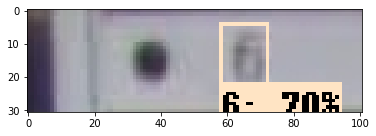

In [4]:
# copy to draw on
draw = image.copy()
draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

# preprocess image for network
image = preprocess_image(image)
image, _ = resize_image(image, 416, 448)

# process image
%timeit boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))

boxes = post_process(boxes, draw, image)
labels = labels[0]
scores = scores[0]
boxes = boxes[0].tolist()

# get valid len
valid_len = len(scores[scores >= .5])

visualize_boxes(draw, boxes, labels, scores, class_labels=[
                '0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])

plt.imshow(draw)
plt.show()


In [5]:
%timeit boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))

10 loops, best of 3: 92.8 ms per loop
